SIMULACION DE LA ECUACION DE LANGMUIR
==========

Ahora resolveremos considerando parte de la gota se evapora y un flujo del aire $\vec{v}_f= v_f \hat{y}$:

$$m\frac{dv}{dt} + v\frac{dm}{dt}= E + F_d - mg = \frac{4\pi}{3} r_d^3 \rho_a g - 6\pi \eta r_d (v - v_f) - \frac{4\pi}{3} r_d^3 \rho_d g $$ 

$$ \frac{dv}{dt}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g - \frac{9 \eta}{2  r_d^2(t) \rho_d}  (v - v_f)  - \frac{v}{m}\frac{dm}{dt}  $$

usaremos la formula de Langmui para la perdida de masa de la gota

$$ \frac{dm}{dt}= - \frac{4 \pi r_d p_v M_v D}{R T_{\infty}}$$

donde $D$ es el coeficiente de difusion de vapor de agua en aire.

Considerando una gota de agua esferica; ademas consideramos una variacion minima de la temperatura tal que diremos que es constante durante el proceso, se tiene que el radio disminuira segun la relacion

$$ \frac{4}{3} \pi r_d^2 \frac{dr_d}{dt}=  - \frac{4 \pi r_d p_v M_v D}{R T_{\infty}} $$

$$ \frac{dr_d}{dt}= - \frac{3 p_v M_v D}{R T_{\infty}} \frac{1}{r_d} $$

$$ r_d^2(t)= r_0^2 - \frac{6 p_v M_v D}{R T_{\infty}} t   $$
Luego reemplazando en la ecuacion diferencial tenemos

$$ \frac{dv}{dt}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g - \frac{9 \eta}{2  r_d^2(t) \rho_d}  (v - v_f)  - \frac{ -3 p_v M_v D }{ \rho_d R T_{\infty}} \frac{1}{r_d^2(t)} v $$

notando que $ \frac{p_v M_v}{R T_{\infty}} $ es la densidad del vapor de agua a la temperatura $T_{\infty}$, escribimos, asumiendo que se comporta como gas ideal

$$ \frac{dv}{dt}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g - \frac{9 \eta}{2  r_d^2(t) \rho_d}  (v - v_f)  + \frac{ 3 \rho_v D }{ \rho_d} \frac{1}{r_d^2(t)} v $$

Consideramos los siguientes datos para la simulacion

$$ \rho_v= 0.025 \:\: \frac{kg}{m^3} $$

$$ D= 0.250 \:\: \frac{cm^2}{s}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

pi=np.pi

ro_a= 1.225 # kg/m3
ro_d= 1000 # kg/m3
eta= 1.849e-5 # kg/m.s
g= 9.81 # m/s2

y0=[0,0]

ro_v= 0.025 
D= 0.25e-4
r_0= 5e-6
velocidad_flujo= 0.15

In [2]:
def gota_langmuir(y, t):
    
    dy=[0,0]
    dy[0]= y[1] 
    dy[1]= (((ro_a /ro_d) - 1) * g ) - (9 *eta / (2 * (r_0**2 - 6 * ro_v * D * t )  * ro_d)) * (y[1] - velocidad_flujo) + 3 * (ro_v/ro_d) * (D/(r_0**2 - 6 * ro_v * D * t) )   * y[1]
    return dy

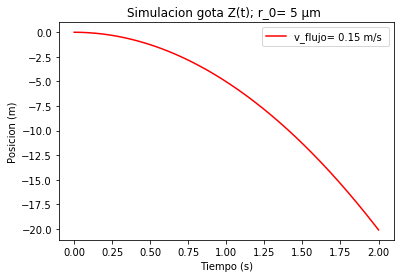

In [3]:
t_0= 0.0001
t_max= 2
dt= 0.00001
t= np.arange(t_0, t_max+dt, dt)

plt.figure()

solucion_langmuir= odeint(gota_langmuir, y0, t)

#print(solucion_langmuir[:,0])

plt.plot(t,solucion_langmuir[:,0],'r', label='v_flujo= 0.15 m/s ')

ax=plt.gca()
ax.set_title('Simulacion gota Z(t); r_0= 5 \N{greek small letter mu}m ')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posicion (m)')
ax.legend()
plt.axis()
plt.show()

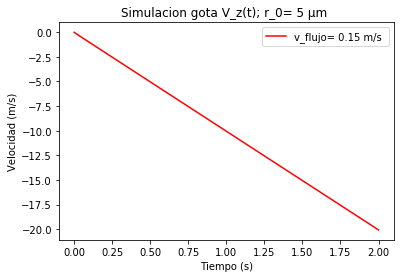

In [4]:
plt.plot(t,solucion_langmuir[:,1],'r', label='v_flujo= 0.15 m/s ')

ax=plt.gca()
ax.set_title('Simulacion gota V_z(t); r_0= 5 \N{greek small letter mu}m ')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad (m/s)')
ax.legend()
plt.axis()
plt.show()

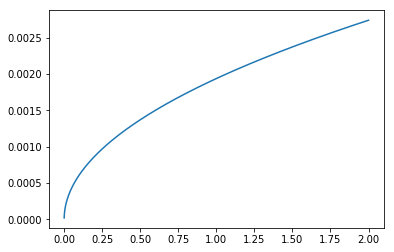

In [5]:
def radio_gota(t):
    radio= np.sqrt(abs(r_0**2 - 6 * ro_v * D * t)) 
    return radio

#print(radio_gota(t)[1])


plt.figure()

plt.plot(t, radio_gota(t))

plt.show()